In [2]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [5]:
(x_train_full,y_train_full),(x_test,y_test) = tf.keras.datasets.california_housing.load_data()
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape


((16512, 8), (16512,), (4128, 8), (4128,))

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((13209, 8), (13209,), (3303, 8), (3303,))

- 일반적인 딥러닝 신경망
  - API방식
    - 객체를 만들고 객체단위로 결합
    - 중간에 레이어를 삽입해도 되고, 삭제도 가능
    - 모델을 저장했을때.. 불러와서 특정 레이어까지 잘라내서 다음은 커스텀한 레이어를 추가
    - 결합할때는 model을 이용  sequence 방식이 아님

In [8]:
# 입력레이어
# 정규화 레이어
# 히든레이어를 2개
# 출력레이어

In [10]:
# 샘플 데이터의 모양 shape
x_train.shape, x_train.shape[1:]

((13209, 8), (8,))

In [17]:
# 필요한 객체 정의
input = tf.keras.layers.Input(shape=x_train.shape[1:] )
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(1)

x = norm(input)
x = hidden1(x)
x = hidden2(x)
output = output(x)

model = tf.keras.Model(inputs=input,outputs=output)


In [30]:
# model.summary()
model.compile(loss='mse',optimizer='adam', metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=14,validation_data=(x_val,y_val),verbose=1)

Epoch 1/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 100035.6016 - loss: 10008456192.0000 - val_RootMeanSquaredError: 100144.5078 - val_loss: 10028922880.0000
Epoch 2/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 100097.1797 - loss: 10019769344.0000 - val_RootMeanSquaredError: 99616.9219 - val_loss: 9923530752.0000
Epoch 3/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 100045.2969 - loss: 10010917888.0000 - val_RootMeanSquaredError: 99259.1484 - val_loss: 9852378112.0000
Epoch 4/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 98653.6953 - loss: 9732965376.0000 - val_RootMeanSquaredError: 98534.5078 - val_loss: 9709049856.0000
Epoch 5/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 97599.6797 - loss: 9530566656.0000 - val_RootMeanSquaredError: 98017.5469 - val_loss: 9607439360.0000
Epoch 6/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 97364.3750 - loss: 9480981

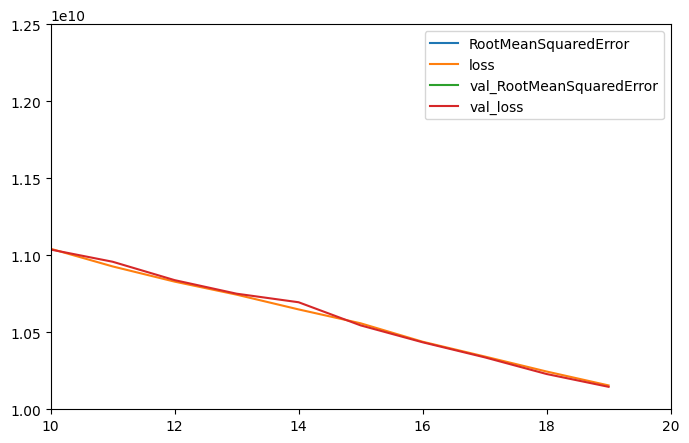

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5),xlim = (10,20),ylim=(1e10,1.25e10))
plt.show()


- 평가 및 예측

In [31]:
model.evaluate(x_test,y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 95379.5547 - loss: 9098869760.0000


[8917997568.0, 94435.1484375]

In [32]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.3291887640953064

- 다층퍼셉트론
  - 와이드 & 딥

In [33]:
# 입력레이어
# 정규화 레이어 는 따로 출력레이어와 테서연산(즉 합친다)
# 히든레이어를 2개
# 출력레이어

In [39]:
# 필요한 객체 정의
input = tf.keras.layers.Input(shape=x_train.shape[1:] )
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate()  # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = norm(input)
x = hidden1(x_)
x = hidden2(x)
x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=input,outputs=output)

In [41]:
# model.summary()
model.compile(loss='mse',optimizer='adam', metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - RootMeanSquaredError: 222837.5625 - loss: 49789857792.0000 - val_RootMeanSquaredError: 162048.8594 - val_loss: 26259832832.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 161773.1406 - loss: 26177126400.0000 - val_RootMeanSquaredError: 158295.1094 - val_loss: 25057341440.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 160831.3281 - loss: 25878691840.0000 - val_RootMeanSquaredError: 153177.0312 - val_loss: 23463204864.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 153995.6562 - loss: 23721527296.0000 - val_RootMeanSquaredError: 145319.1562 - val_loss: 21117657088.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 144673.2656 - loss: 20939284480.0000 - val_RootMeanSquaredError: 135260.9062 - val_loss: 18295513088.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 133757.8125 - 

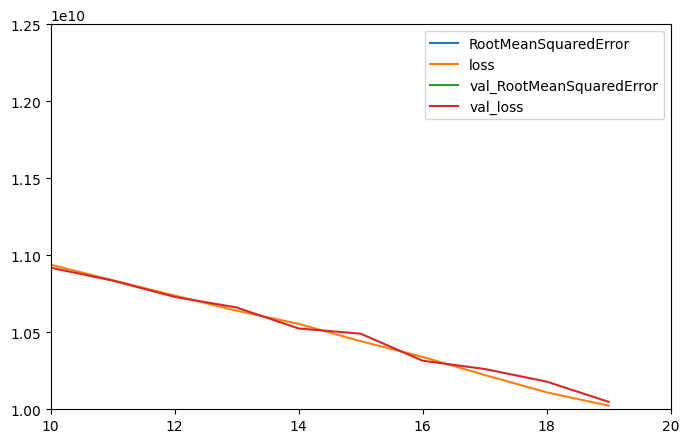

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim = (10,20),ylim=(1e10,1.25e10))
plt.show()

In [43]:
r2_score(y_test,y_pred)

0.3291887640953064

- 딥러닝 적용
 - 타이타닉 생존자 분류
 - iris 품종분류

In [3]:
from sklearn.datasets import load_iris
from seaborn import load_dataset
iris_df = load_iris(as_frame=True)
titanic_df = load_dataset('titanic')

In [4]:
# iris 품좀 분류
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test= train_test_split(iris_df.data,iris_df.target, stratify=iris_df.target,random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train_full,y_train_full, stratify=y_train_full,random_state=42)


In [6]:
# hidden 10,20,30
# 결합방식은 함수형 API방식
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
h1 = tf.keras.layers.Dense(10,activation='relu')
h2 = tf.keras.layers.Dense(20,activation='relu')
h3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

# 결합
x = norm(input)
x = h1(x)
x = h2(x)
x = h3(x)
output = output(x)
model = tf.keras.Model(inputs=input,outputs=output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.3346 - loss: 2.6130 - val_accuracy: 0.3571 - val_loss: 2.3281
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3190 - loss: 2.3713 - val_accuracy: 0.3571 - val_loss: 2.0622
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3620 - loss: 1.9234 - val_accuracy: 0.3571 - val_loss: 1.8378
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3229 - loss: 1.8734 - val_accuracy: 0.3571 - val_loss: 1.6525
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3307 - loss: 1.6623 - val_accuracy: 0.3571 - val_loss: 1.5067
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3581 - loss: 1.4615 - val_accuracy: 0.3571 - val_loss: 1.3946
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3112 - loss: 1.4076 - val_accuracy: 0.3571 - val_loss: 1.3051
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3229 - loss: 1.3158 - val_accuracy: 0.1429 - val_loss: 1.2337

In [7]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6190 - loss: 0.8650


[0.867682933807373, 0.6315789222717285]

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.8947368421052632

- 타이타닉

In [10]:
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [30]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
train_df = titanic_df.loc[:,:'embarked']
X = train_df.drop('survived',axis=1)
y = train_df['survived']

X = pd.get_dummies(X)
X = StandardScaler().fit_transform(X)
X.shape, y.shape

# 딥러닝 모델 설계
import tensorflow as tf
input = tf.keras.layers.Input(shape=X.shape[1:])
norm = tf.keras.layers.Normalization()
h1 = tf.keras.layers.Dense(10,activation='relu')
h2 = tf.keras.layers.Dense(10,activation='relu')
h3 = tf.keras.layers.Dense(5,activation='relu')
output = tf.keras.layers.Dense(1,activation='sigmoid')

# 이진분류 : binary_crossentropy
# 다중분류
  # 정답이 레이블형태면 sparse_category_crossentropy
  # 정답이 원핫형태면 category_crossentropy
  # 데이터를 원핫으로 변경하고 category_crossentropy  성능이 좀더 좋은 경우가 많음

x = input
x = norm(x)
x = h1(x)
x = h2(x)
x = h3(x)
output = output(x)
model = tf.keras.Model(inputs=input,outputs=output)

from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test= train_test_split(X,y, stratify=y,random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train_full,y_train_full, stratify=y_train_full,random_state=42)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.2264 - loss: 0.7448 - val_accuracy: 0.4118 - val_loss: 0.7169
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2160 - loss: 0.7421 - val_accuracy: 0.4118 - val_loss: 0.7118
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2332 - loss: 0.7299 - val_accuracy: 0.5000 - val_loss: 0.7066
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2934 - loss: 0.7185 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3388 - loss: 0.7089 - val_accuracy: 0.5000 - val_loss: 0.6969
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3367 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4267 - loss: 0.7018 - val_accuracy: 0.5294 - val_loss: 0.6877
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.5294 - val_loss: 0.6824


In [32]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6368 - loss: 0.6589 


[0.6477403044700623, 0.6739130616188049]

In [38]:
result = model.predict(x_test)
[ 1 if data >= 0.6 else 0 for data in result  ]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1]

In [ ]:
# threshold : 임계치는 하이퍼 파라메터 처럼 여러개를 적용해서 accuracy의 값이 가장 큰 경우의 임계를 적용